#### Europion Soccer Analysis 
Here i Downloded DB file of Europiom Soccer game from the Keggle.
here i'm going to mention some points which i'll extract from the DB file.

1.league According to thair country

2.Match details for a specific Country (here i find out for Spain) like Home team Gole,Away_team_gole, CountryName, LeagueName. 

3.According to Season I'll also do some Analysis like What was the avg home team goal and Avg of away team goal, And total goal

4.Which players have the most penalties?

5.The team who has the higher goals.

# Dataset-- https://drive.google.com/file/d/1bYtM5TS1MsBeLqLHiw4q1kt9i5BNZWXK/view?usp=share_link

In [1]:
#important Library
import pandas as pd
import numpy as np
#for sql 
import sqlite3 as sq
#for Preporcessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#make a conncetion with DB file
conn = sq.connect(r"C:\pythone\Masai\Sql_project_by_python\dataset\European_soccer.sqlite")
#for running sql query 
cur=conn.cursor()

# 1st way

In [3]:
cur.execute("SELECT Name FROM sqlite_master WHERE type='table'")
tables1=cur.fetchall()
tables1 #here you can see these are the tables we have in this DB file 

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

# 2nd way

In [4]:
conn=sq.connect(r"C:\pythone\Masai\Sql_project_by_python\dataset\European_soccer.sqlite")
tables=pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


##### These are the table name which is stored in this DB file

## Fatch data from the different Table

### convert all the table into dataframe

In [5]:
tb_name=[i for i in tables['name']]
tb_name #Tables name in a list

['sqlite_sequence',
 'Player_Attributes',
 'Player',
 'Match',
 'League',
 'Country',
 'Team',
 'Team_Attributes']

In [6]:
for i in tb_name:
    df=pd.read_sql(f"SELECT * FROM {i}", conn)
    exec(f"{i}=df") #here i am using exec function because of we can't give variable name into loop, here type of i is string and df is a local variable so we can't change that's why i have to use exec function 

#### Country

In [7]:
Country #now you can see this is the Country table which has converted into a dataframe

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### league

In [8]:
League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


#### Player_Attributes

In [9]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


#### Player

In [10]:
Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


#### Match

In [11]:
Match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### team

In [12]:
Team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


#### Team_Attributes

In [13]:
Team_Attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


### league and their country

In [14]:
#so i have to join two tables league and country but we can join two tables based on a key and there country id is a key 
country_league=pd.read_sql("SELECT * FROM Country a JOIN League b ON a.ID=b.Country_id", conn)
country_league
#so here you can see the league of Belgium Jupiler League from Belgium country 

,id,name,id,country_id,name
0,1,Belgium,1,1,Belgium Jupiler League
1,1729,England,1729,1729,England Premier League
2,4769,France,4769,4769,France Ligue 1
3,7809,Germany,7809,7809,Germany 1. Bundesliga
4,10257,Italy,10257,10257,Italy Serie A
5,13274,Netherlands,13274,13274,Netherlands Eredivisie
6,15722,Poland,15722,15722,Poland Ekstraklasa
7,17642,Portugal,17642,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,19694,Scotland Premier League
9,21518,Spain,21518,21518,Spain LIGA BBVA


### Match details

##### in output i want- matchid, CountryName, LeagueName,season, stage, date, home_team_name, away_team_name, Home_team_gole,  Away_team_gole

#match Table-
#Country Table
#league Table
#Team Table
#i have to join these four table 
##### note match table has all keys to join different table



In [15]:
match_details=pd.read_sql("""SELECT m.id, c.name as Country_n, l.name as League_n,season, Stage, Date,th.team_long_name, ta.team_long_name, home_team_goal, away_team_goal  
FROM Match m
JOIN Country c
ON m.Country_id=c.id
JOIN League l
ON m.League_id=l.id
LEFT JOIN Team th
ON m.home_team_api_id=th.team_api_id
LEFT JOIN Team ta
ON m.away_team_api_id=ta.team_api_id
WHERE c.name='Spain'
ORDER BY Date asc 
""", conn)

In [16]:
match_details

,id,Country_n,League_n,season,stage,date,team_long_name,team_long_name,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
...,...,...,...,...,...,...,...,...,...,...
3035,24490,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Sporting de Gijón,Villarreal CF,2,0
3036,24491,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Betis Balompié,Getafe CF,2,1
3037,24492,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,RCD Espanyol,SD Eibar,4,2
3038,24495,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Málaga CF,UD Las Palmas,4,1


## Analysis

In [17]:
league_analysis = pd.read_sql("""SELECT c.name as country_n, l.name as League_n, season, count(distinct stage) as stage,
count(distinct (m.home_team_api_id)) as number_of_team, avg(m.home_team_goal) as avg_home_team_goal, avg(m.away_team_goal) as avg_away_team_goal, avg((m.home_team_goal-m.away_team_goal)) as avg_goal_dif,
avg(m.home_team_goal+m.away_team_goal) as avg_goals, sum(m.home_team_goal+m.away_team_goal) as total_goals
FROM match m
JOIN Country c
ON m.Country_id=c.id
JOIN league l
ON m.league_id=l.id
WHERE country_n in ('Spain', 'Germany', 'France', 'Italy', 'England')
GROUP BY c.name, l.name,  season
HAVING  count(distinct stage)>10
ORDER BY c.name, l.name,  season ASC

""", conn)

In [18]:
league_analysis.head()

,country_n,League_n,season,stage,number_of_team,avg_home_team_goal,avg_away_team_goal,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
1,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
2,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
3,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
4,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063


#### avg_goal of country based on season
Here i'm going to make a Dataframe where i'll store Avg goal of every team according to thair season

In [19]:
df = pd.DataFrame(index=np.sort(league_analysis['season'].unique()), columns=league_analysis['country_n'].unique())
df

,England,France,Germany,Italy,Spain
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[:,'England']=list(league_analysis.loc[league_analysis['country_n']=='England', 'avg_goals'])
df.loc[:,'France']=list(league_analysis.loc[league_analysis['country_n']=='France', 'avg_goals'])
df.loc[:,'Germany']=list(league_analysis.loc[league_analysis['country_n']=='Germany', 'avg_goals'])
df.loc[:,'Italy']=list(league_analysis.loc[league_analysis['country_n']=='Italy', 'avg_goals'])
df.loc[:,'Spain']=list(league_analysis.loc[league_analysis['country_n']=='Spain', 'avg_goals'])

In [21]:
df #here we can see the avg gole of every country according to the season 

,England,France,Germany,Italy,Spain
2008/2009,2.478947,2.257895,2.921569,2.600000,2.897368
2009/2010,2.771053,2.410526,2.830065,2.610526,2.713158
2010/2011,2.797368,2.342105,2.921569,2.513158,2.742105
2011/2012,2.805263,2.515789,2.859477,2.583799,2.763158
2012/2013,2.797368,2.544737,2.934641,2.639474,2.871053
2013/2014,2.768421,2.455263,3.160131,2.723684,2.750000
2014/2015,2.565789,2.492105,2.754902,2.686016,2.655263
2015/2016,2.700000,2.526316,2.830065,2.576316,2.744737


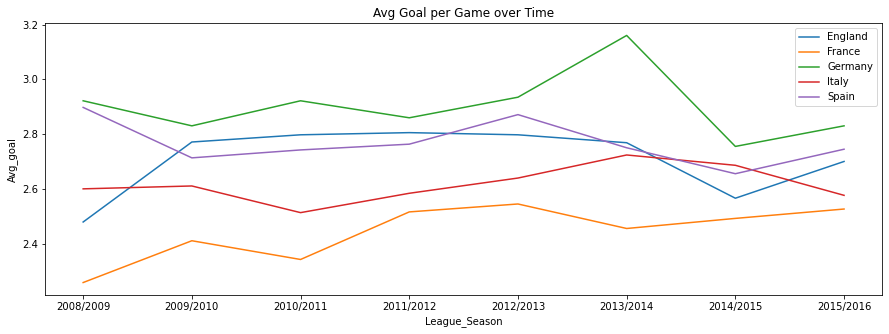

In [22]:
#lets see this things by a line graph
df.plot(figsize=(15,5), title='Avg Goal per Game over Time')
plt.xlabel("League_Season")
plt.ylabel("Avg_goal")
plt.show()

In [24]:
# Which players have the most penalties?
#     1.player Dataframe (for Player Name)(Player_api_id, id, player_fifa_api_id)
#     2.Player_Attributes Dataframe (for Penalties)

# player_api_id, player_name, penalties,preferred_foot, potential (for that i have to join player and player_Attibutes table on the player_api_id)

In [25]:
player_penalites=pd.read_sql('''SELECT p.player_api_id, p.player_name, sum(pa.penalties) as total_penalties,
preferred_foot, potential, attacking_work_rate, defensive_work_rate FROM 
Player as p
JOIN Player_Attributes as pa
ON p.player_api_id=pa.player_api_id
GROUP BY p.player_api_id
ORDER BY total_penalties desc limit 10
''', conn)

In [26]:
player_penalites

,player_api_id,player_name,total_penalties,preferred_foot,potential,attacking_work_rate,defensive_work_rate
0,41269,Alessio Cerci,4314,left,77,medium,low
1,108808,Mario Balotelli,4120,right,81,low,low
2,41890,Claudio Marchisio,3984,right,84,high,high
3,26472,Michael Bradley,3813,right,79,medium,high
4,25772,Zdravko Kuzmanovic,3799,right,74,medium,medium
5,30731,Andrea Pirlo,3791,right,81,low,low
6,27734,Antonio Di Natale,3767,right,77,medium,low
7,30626,Thierry Henry,3712,right,79,medium,medium
8,40930,Adrien Silva,3682,right,81,high,high
9,47394,Adel Taarabt,3650,right,76,medium,low


<AxesSubplot:xlabel='player_name', ylabel='total_penalties'>

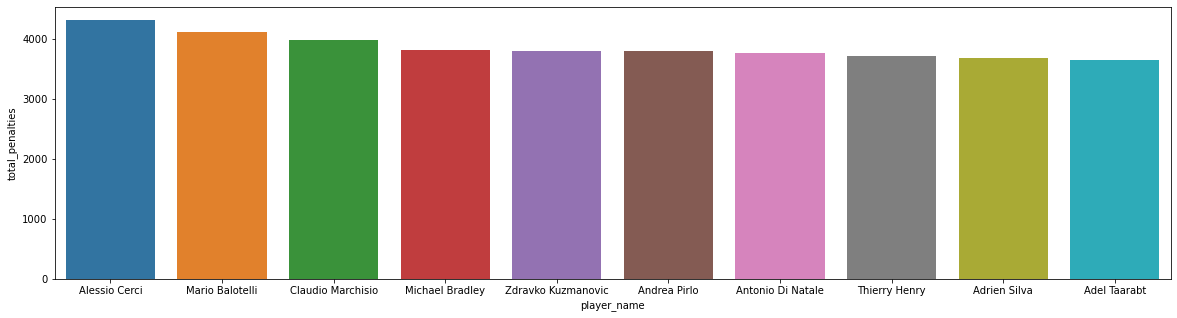

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(data=player_penalites, x='player_name', y='total_penalties')

##### These are top 10 Player who has most penalties Score 

In [28]:
# The team who has the higher goals.
    #join match and team table on the basis of team_api_id 
    #after that find the insight like season, team_api_id, team_name, total_goles

In [43]:
higher_goal_team=pd.read_sql('''SELECT season, m.home_team_api_id, t.team_long_name as team_name,
sum(home_team_goal+away_team_goal) as total_goal
FROM Match as m
JOIN team as t
ON m.home_team_api_id=t.team_api_id
group by m.home_team_api_id
order by total_goal desc
''', conn)

In [44]:
higher_goal_team

,season,home_team_api_id,team_name,total_goal
0,2008/2009,8633,Real Madrid CF,652
1,2008/2009,8634,FC Barcelona,596
2,2008/2009,8640,PSV,496
3,2008/2009,8456,Manchester City,490
4,2008/2009,10192,BSC Young Boys,485
...,...,...,...,...
294,2015/2016,6367,Uniao da Madeira,36
295,2015/2016,8121,Angers SCO,35
296,2008/2009,7992,Trofense,35
297,2011/2012,4064,Feirense,32


In [52]:
higher_goal_team_only_top10=pd.read_sql('''SELECT season, m.home_team_api_id, t.team_long_name as team_name,
sum(home_team_goal+away_team_goal) as total_goal
FROM Match as m
JOIN team as t
ON m.home_team_api_id=t.team_api_id
group by m.home_team_api_id
order by total_goal desc limit 10
''', conn)

In [53]:
higher_goal_team_only_top10

,season,home_team_api_id,team_name,total_goal
0,2008/2009,8633,Real Madrid CF,652
1,2008/2009,8634,FC Barcelona,596
2,2008/2009,8640,PSV,496
3,2008/2009,8456,Manchester City,490
4,2008/2009,10192,BSC Young Boys,485
5,2008/2009,9823,FC Bayern Munich,478
6,2008/2009,9925,Celtic,477
7,2008/2009,9931,FC Basel,470
8,2008/2009,10228,SC Heerenveen,469
9,2008/2009,8455,Chelsea,462


#### These are top 10 teams who has maximum goal in 2008/2009 season

Text(0, 0.5, 'Total Goal')

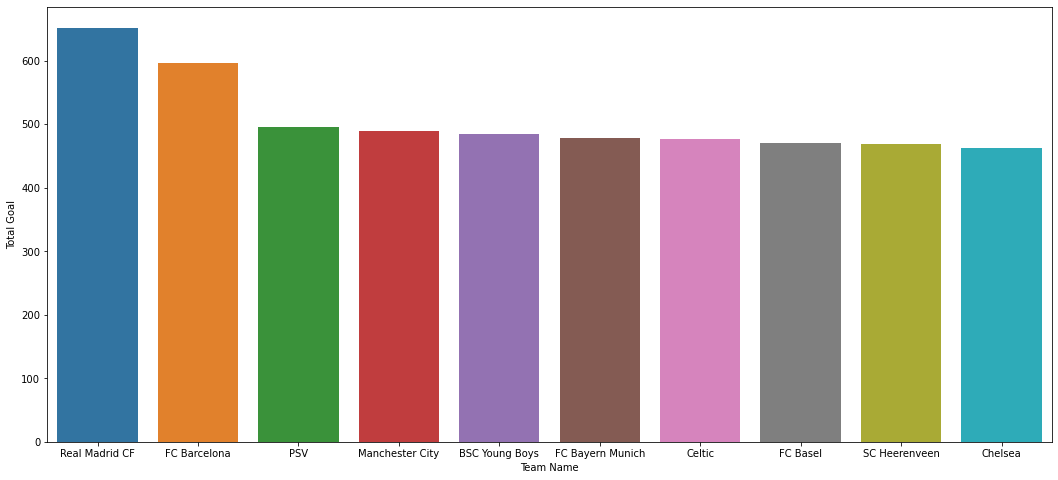

In [57]:
plt.figure(figsize=(18,8))
sns.barplot(data=higher_goal_team_only_top10, x='team_name', y='total_goal')
plt.xlabel('Team Name')
plt.ylabel('Total Goal')